<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S5E2: BACKPACK PRICE**

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: Predict the price of backpacks based on various attributes

**Dataset**: Features include brand, material, size, compartments, waterproofing, and weight capacity.Generated using a deep learning model trained on the Student Bag Price Prediction Dataset.

**Exploration**: Explore differences between this dataset and the original Flood Prediction Factors dataset.
Investigate whether incorporating the original dataset into training improves model performance.
Utilize visualization techniques for EDA.
The dataset is suitable for clustering analysis.

**Evaluation**: Root Mean Squared Error (RMSE)..

**Submission**: train.csv – Training dataset with price labels.
                test.csv – Test dataset without price labels.
                sample_submission.csv – Required submission format.

# **S4E10 - LOAN APPROVAL**

In [1]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.4

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scikit_learn-1.6.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.7 MB/s eta 0:00:00


In [2]:
%%capture
!pip install -qq pytorch_tabnet
!pip install optuna
!pip install --upgrade catboost
!pip install optuna-integration-pytorch-tabnet
!pip install cuml-cu11
from pytorch_tabnet.tab_model import TabNetRegressor

!pip install --upgrade cupy-cuda11x  # Or replace with your CUDA version (e.g., cupy-cuda118)
!pip install cuml-cu12

!pip install --upgrade category-encodersy
!pip install optuna-integration
!pip install colorama
#!pip install pyfiglet
#!pip install keras-tuner --upgrade
#!pip install keras-nlp
#!pip install BorutaShap
#!pip install scikit-learn==1.2.2
#!pip install scikit-lego
!pip install skops

In [7]:
import sklearn
import lightgbm, xgboost, catboost
sklearn.__version__, lightgbm.__version__, xgboost.__version__, catboost.__version__

('1.4.0', '4.5.0', '2.1.3', '1.2.7')

In [8]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

from cuml.preprocessing import TargetEncoder

# Import libraries for Hypertuning
#import keras_tuner as kt
#from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
#import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

#from category_encoders.cat_boost import CatBoostEncoder
#from category_encoders.wrapper import PolynomialWrapper
#from category_encoders.count import CountEncoder
#from category_encoders import TargetEncoder

import skops.io as sio

warnings.filterwarnings('ignore')
#import pyfiglet
#plt.style.use('fivethirtyeight')

<Figure size 960x660 with 0 Axes>

In [9]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
#         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# import font colors
from colorama import Fore, Style, init

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

init(autoreset=True)

<Figure size 960x660 with 0 Axes>

In [10]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


## FUNCTIONS:

* **Plotting Functiss**

In [11]:
def plot_scatter(df, x="feat1", y="feat2", color_feature=None, cmap='viridis'):
    """
    Generates a scatter plot with points colored based on a third feature.

    Args:
        df: Pandas DataFrame containing the data.
        x: Name of the column to use for the x-axis.
        y: Name of the column to use for the y-axis.
        color_feature: Name of the column to use for coloring the points.
                       If None, points will be a single color.
        cmap: Colormap to use for coloring the points (e.g., 'viridis', 'plasma', 'magma', 'inferno', 'cividis').
              See matplotlib documentation for available colormaps.
    """

    plt.figure(figsize=(5, 5))

    if color_feature is not None:
        # Ensure the color feature exists
        if color_feature not in df.columns:
            raise ValueError(f"Color feature '{color_feature}' not found in DataFrame.")

        # Scatter plot with colors
        scatter = plt.scatter(df[x], df[y], c=df[color_feature], cmap=cmap)

        # Add a colorbar
        cbar = plt.colorbar(scatter)
        cbar.set_label(color_feature)  # Label the colorbar

    else:
        # Simple scatter plot (single color)
        plt.scatter(df[x], df[y],color="royalblue",alpha=0.6)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Scatter Plot")  # Add a title for better visualization
    plt.show()

* **Dataset Management Functions**:

In [12]:
class Config:

    state = 42
    n_splits = 10
    early_stop = 200

    target = 'Price'
    train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/train.csv')
    test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/test.csv')
    submission = pd.read_csv( "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/sample_submission.csv")
    train_org = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/training_extra.csv")

    train.Compartments = train.Compartments.astype('str')
    test.Compartments = test.Compartments.astype('str')
    train_org.Compartments = train_org.Compartments.astype('str')

    original_data = 'Y'
    outliers = 'N'
    log_trf = 'N'
    scaler_trf = 'Y'
    feature_eng = 'N'
    missing = 'Y'
    force_normalization="N"
    impose_normalization="N"
    trg_enc = "N"
    problem = "Regression"
    metric_goal="RMSE"
    direction_="minimize"
    log_trans_cols = []
    force_norm_cols = ["Weight Capacity (kg)"]
    impose_norm_cols = []
    trg_enc_feat = []

class Preprocessing():

    def __init__(self):
        self.train = Config.train
        self.test = Config.test
        self.targets = Config.target

        self.prp_data()

    def prp_data(self):

        if Config.original_data == 'Y':
            self.train = pd.concat([self.train, Config.train_org], ignore_index=True).drop_duplicates(ignore_index=True)

        self.train = self.train.drop(['id'], axis=1)
        self.test = self.test.drop(['id'], axis=1)

        self.cat_features = self.train.drop(self.targets, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()
        self.num_features = self.train.drop(self.targets, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()

        self.train = self.reduce_mem(self.train)
        self.test = self.reduce_mem(self.test)
        return self

    def reduce_mem(self, df):

        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', "uint16", "uint32", "uint64"]

        for col in df.columns:
            col_type = df[col].dtypes

            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()

                if "int" in str(col_type):
                    if c_min >= np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min >= np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float32)
                    if c_min >= np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

        return df

class EDA(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        self.data_info()
        self.heatmap()
        self.dist_plots()
        self.cat_feature_plots()
        if Config.problem == 'Classification':
          self.target_pie()
        else:
          self.target_dist()

    def data_info(self):

        for data, label in zip([self.train, self.test], ['Train', 'Test']):
            table_style = [{'selector': 'th:not(.index_name)',
                            'props': [('background-color', 'slategrey'),
                                      ('color', '#FFFFFF'),
                                      ('font-weight', 'bold'),
                                      ('border', '1px solid #DCDCDC'),
                                      ('text-align', 'center')]
                            },
                            {'selector': 'tbody td',
                             'props': [('border', '1px solid #DCDCDC'),
                                       ('font-weight', 'normal')]
                            }]
            print(Style.BRIGHT+Fore.RED+f'\n{label} head\n')
            display(data.head().style.set_table_styles(table_style))

            print(Style.BRIGHT+Fore.RED+f'\n{label} info\n'+Style.RESET_ALL)
            display(data.info())

            print(Style.BRIGHT+Fore.RED+f'\n{label} describe\n')
            display(data.describe().drop(index='count', columns=self.targets, errors = 'ignore').T
                    .style.set_table_styles(table_style).format('{:.3f}'))

            print(Style.BRIGHT+Fore.RED+f'\n{label} missing values\n'+Style.RESET_ALL)
            display(data.isnull().sum())
        return self

    def heatmap(self):
        print(Style.BRIGHT+Fore.RED+f'\nCorrelation Heatmap\n')
        plt.figure(figsize=(7,7))
        corr = self.train.select_dtypes(exclude='object').corr(method='pearson')
        sns.heatmap(corr, fmt = '0.2f', cmap = 'Blues', annot=True, cbar=False)
        plt.show()

    def dist_plots(self):

        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Numerical\n")
        df = pd.concat([self.train[self.num_features].assign(Source = 'Train'),
                        self.test[self.num_features].assign(Source = 'Test'),],
                        axis=0, ignore_index = True)

        fig, axes = plt.subplots(len(self.num_features), 2 ,figsize = (13, len(self.num_features) * 4),
                                 gridspec_kw = {'hspace': 0.3,
                                                'wspace': 0.2,
                                                'width_ratios': [0.70, 0.30]
                                               }
                                )
        for i,col in enumerate(self.num_features):
            try:
                ax = axes[i,0]
            except:
                ax = axes[i]
            sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source',
                        palette = ['royalblue', 'tomato'], ax = ax, alpha=0.7, linewidth = 2
                       )
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col}")
            ax.grid('--',alpha=0.7)

            try:
                ax = axes[i,1]
            except:
                ax = axes[1]
            sns.boxplot(data = df, y = col, x=df.Source, width = 0.5,
                        linewidth = 1, fliersize= 1,
                        ax = ax, palette=['royalblue', 'tomato']
                       )
            ax.set_title(f"\n{col}")
            ax.set(xlabel = '', ylabel = '')
            ax.tick_params(axis='both', which='major')
            ax.set_xticklabels(['Train', 'Test'])

        plt.tight_layout()
        plt.show()

    def cat_feature_plots(self):
        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Categorical\n")
        fig, axes = plt.subplots(len(self.cat_features), 2 ,figsize = (18, len(self.cat_features) * 6),
                                 gridspec_kw = {'hspace': 0.5,
                                                'wspace': 0.2,
                                               }
                                )

        for i, col in enumerate(self.cat_features):

            ax = axes[i,0]
            sns.barplot(data=self.train[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='royalblue', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Train")

            ax = axes[i,1]
            sns.barplot(data=self.test[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='tomato', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Test")

        plt.tight_layout()
        plt.show()

    def target_pie(self):
        print(Style.BRIGHT+Fore.RED+f"\nTarget feature distribution\n")
        targets = self.train[self.targets]
        plt.figure(figsize=(6, 6))
        plt.pie(targets.value_counts(), labels=targets.value_counts().index, autopct='%1.2f%%', colors=palette_9)
        plt.show()

    def target_dist(self):
        print(Style.BRIGHT+Fore.RED+f"\nTarget feature distribution\n")
        fig, axes = plt.subplots(1, 1, figsize=(7, 5))
        sns.histplot(self.train[self.targets], kde=True, ax=axes)
        axes.set_title('Distribution of Price')
        axes.set_xlabel(self.targets)
        axes.set_ylabel('Frequency')

## **1.0 Dataset Version Uploads**

In [13]:
df_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/train.csv',index_col=0)

df_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/test.csv',index_col=0)

df_train_orig = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/training_extra.csv'
)

df_subm = pd.read_csv(
    "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/sample_submission.csv",index_col=0)

In [14]:
df_train_orig = df_train_orig.dropna(subset="Price")
df_train_orig.isnull().sum(),df_train.isnull().sum()

(id                           0
 Brand                   117053
 Material                102615
 Size                     81190
 Compartments                 0
 Laptop Compartment       91089
 Waterproof               87274
 Style                    96210
 Color                   123667
 Weight Capacity (kg)      1670
 Price                        0
 dtype: int64,
 Brand                   9705
 Material                8347
 Size                    6595
 Compartments               0
 Laptop Compartment      7444
 Waterproof              7050
 Style                   7970
 Color                   9950
 Weight Capacity (kg)     138
 Price                      0
 dtype: int64)

In [15]:
df_train.head()
df_train.shape,df_test.shape,df_train_orig.shape

((300000, 10), (200000, 9), (3694318, 11))

In [16]:
df_train.info()
df_train.Size.unique()

df_train.Size = df_train.Size.replace({'Medium':2, 'Small':1, 'Large':3, np.nan:0},regex=True)

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 25.2+ MB


In [17]:
#plot_scatter(df=df_train,x="Weight Capacity (kg)",y="Size",color_feature="Price")

In [18]:
df_train.groupby("Size")[["Weight Capacity (kg)","Price"]].agg(["mean","std"])

Weight Capacity (kg)                Price           
                     mean       std       mean        std
Size                                                     
0.0             18.496559  6.876839  78.671190  40.190114
1.0             18.001927  6.945308  81.424674  38.999298
2.0             18.023904  6.963246  81.343418  38.707882
3.0             18.031644  6.995917  81.651446  39.332187


Train head



,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.158752
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.880562
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643761,39.173199
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937221,80.607933
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.023117



Train info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 object 
 1   Material              object 
 2   Size                  object 
 3   Compartments          object 
 4   Laptop Compartment    object 
 5   Waterproof            object 
 6   Style                 object 
 7   Color                 object 
 8   Weight Capacity (kg)  float32
 9   Price                 float32
dtypes: float32(2), object(8)
memory usage: 274.3+ MB


None


Train describe



,mean,std,min,25%,50%,75%,max
Weight Capacity (kg),18.010,6.960,5.000,12.069,18.054,23.988,30.000



Train missing values



,0
Brand,126758
Material,110962
Size,87785
Compartments,0
Laptop Compartment,98533
Waterproof,94324
Style,104180
Color,133617
Weight Capacity (kg),1808
Price,0



Test head



,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671146
1,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,nan,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953



Test info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 193773 non-null  object 
 1   Material              194387 non-null  object 
 2   Size                  195619 non-null  object 
 3   Compartments          200000 non-null  object 
 4   Laptop Compartment    195038 non-null  object 
 5   Waterproof            195189 non-null  object 
 6   Style                 194847 non-null  object 
 7   Color                 193215 non-null  object 
 8   Weight Capacity (kg)  199923 non-null  float32
dtypes: float32(1), object(8)
memory usage: 13.0+ MB


None


Test describe



,mean,std,min,25%,50%,75%,max
Weight Capacity (kg),17.993,6.972,5.000,12.069,18.055,23.966,30.000



Test missing values



,0
Brand,6227
Material,5613
Size,4381
Compartments,0
Laptop Compartment,4962
Waterproof,4811
Style,5153
Color,6785
Weight Capacity (kg),77



Correlation Heatmap



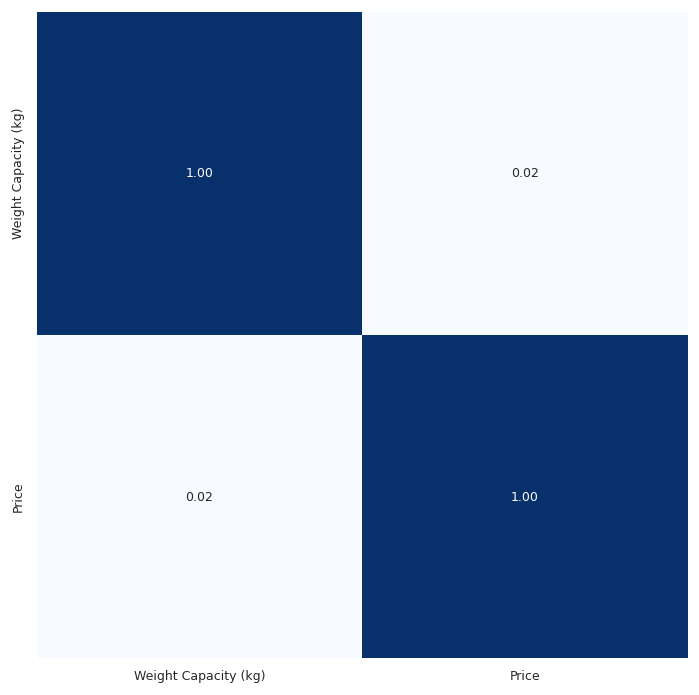


Distribution analysis - Numerical



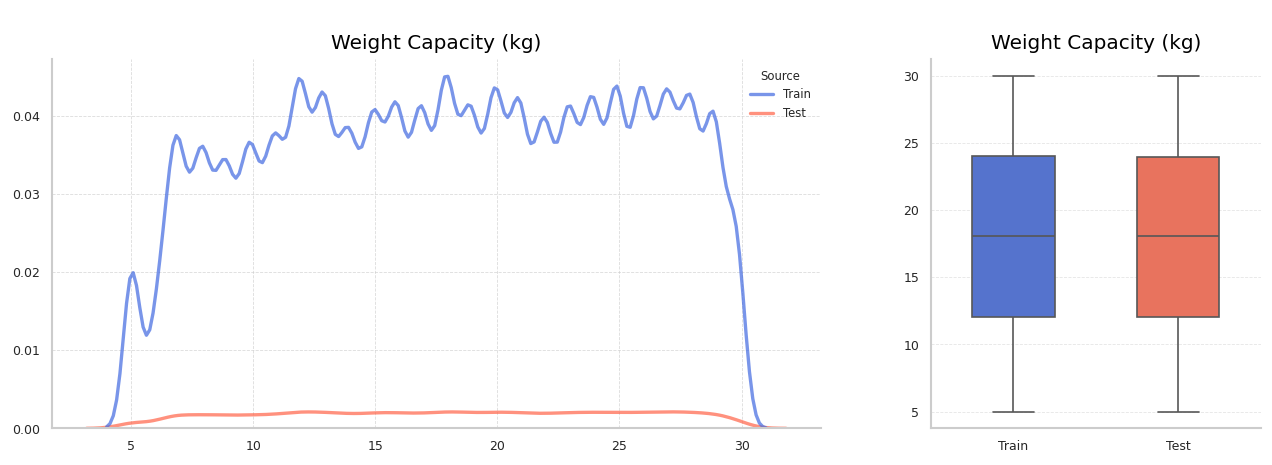


Distribution analysis - Categorical



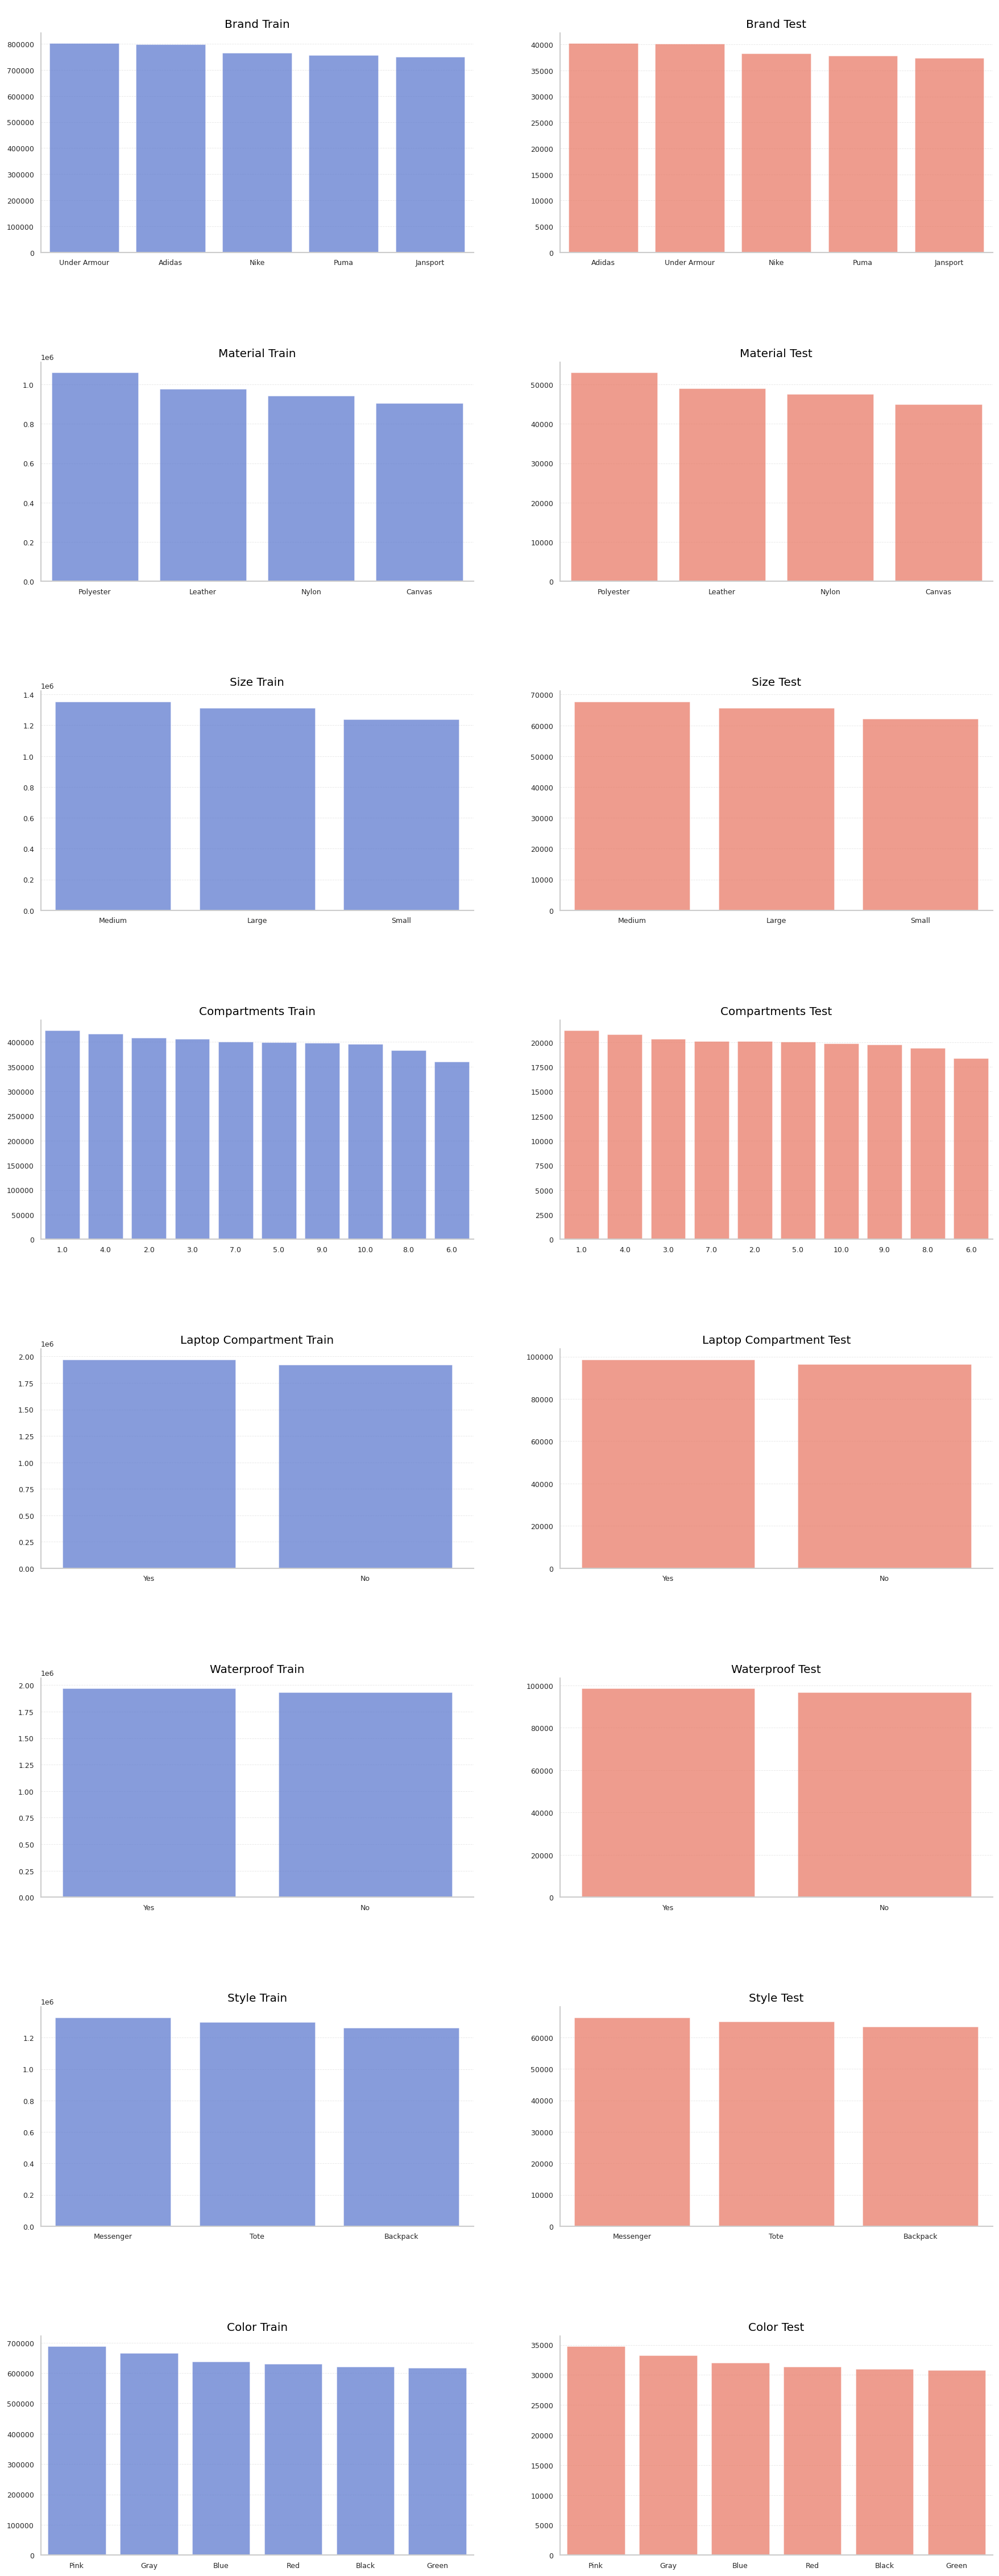


Target feature distribution



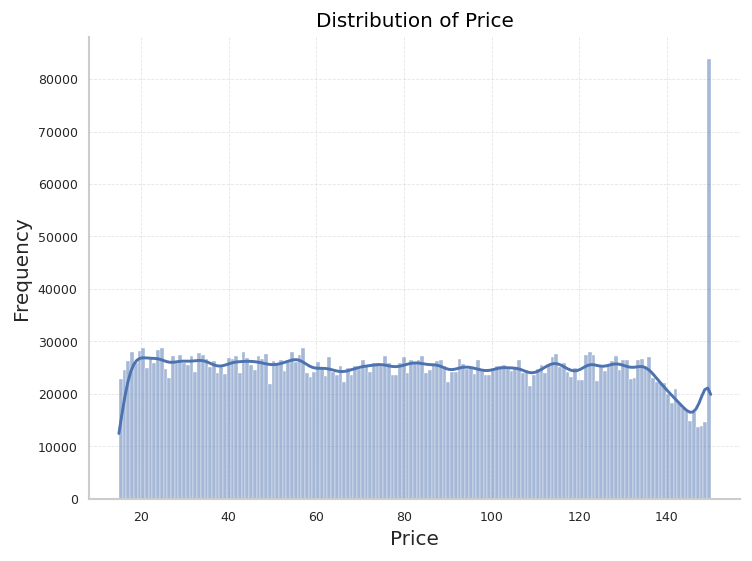

In [19]:
eda = EDA()

## 2.0 Data Transformation and Feature Engeneering:

In [20]:
class Transform(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        if self.missing == 'Y':
            self.missing_values()

        self.train_raw = self.train.copy()

        if self.feature_eng == 'Y':
            self.train = self.new_features(self.train)
            self.test = self.new_features(self.test)
            self.train_raw = self.new_features(self.train_raw)

        self.num_features = self.train.drop(self.target, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()
        self.cat_features = self.train.drop(self.target, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()

        if self.outliers == 'Y':
            self.remove_outliers()

        if self.log_trf == 'Y':
            self.log_transformation()

        if self.force_normalization == 'Y':
            self.forced_norm_transformation()

        if self.impose_normalization == 'Y':
            self.impose_normalization_transformation()

        if self.trg_enc == 'Y':
            self.target_encoding()

        if self.scaler_trf == 'Y':
            self.scaler()

        if self.outliers == 'Y' or self.log_trf == 'Y' or self.scaler_trf =='Y':
            self.distribution()

    def __call__(self):

        self.train[self.cat_features] = self.train[self.cat_features].astype('category')
        self.test[self.cat_features] = self.test[self.cat_features].astype('category')
        data = pd.concat([self.test, self.train])
        self.train_enc, self.test_enc = self.encode(data)

        self.cat_features_card = []
        for f in self.cat_features:
            self.cat_features_card.append(1 + data[f].max())

        self.y = self.train[self.target]
        self.train = self.train.drop(self.target, axis=1)
        self.train_enc = self.train_enc.drop(self.target, axis=1)

        scaler = StandardScaler()
        self.train_enc[self.num_features] = scaler.fit_transform(self.train_enc[self.num_features])
        self.test_enc[self.num_features] = scaler.transform(self.test_enc[self.num_features])

        return self.train, self.train_enc, self.y, self.test, self.test_enc, self.cat_features

    def encode(self, data):

        oe = OrdinalEncoder()
        data[self.cat_features] = oe.fit_transform(data[self.cat_features]).astype('int')

        train_enc = data[~data[self.target].isnull()]
        test_enc = data[data[self.target].isnull()].drop(self.target, axis=1)
        return train_enc, test_enc

    def new_features(self, df):
        #Replace Some entries that appears wrong in the dataset:

        return df

    def log_transformation(self):

        self.train[self.log_trans_cols] = np.log1p(self.train[self.log_trans_cols])
        self.test[self.log_trans_cols] = np.log1p(self.test[self.log_trans_cols])

        return self

    def forced_norm_transformation(self):

        self.train[self.force_norm_cols] = np.sqrt(self.train[self.force_norm_cols]+0.1)
        self.test[self.force_norm_cols] = np.sqrt(self.test[self.force_norm_cols]+0.1)

        return self

    def impose_normalization_transformation(self):

        scaler = QuantileTransformer(output_distribution='normal',subsample=20_000,random_state=42)
        self.train[self.impose_norm_cols] = scaler.fit_transform(self.train[self.impose_norm_cols])
        self.test[self.impose_norm_cols] = scaler.transform(self.test[self.impose_norm_cols])

        return self


    def distribution(self):

        print(Style.BRIGHT+Fore.RED+f'\nHistograms of distribution\n')
        fig, axes = plt.subplots(nrows=len(self.num_features), ncols=2, figsize=(15, len(self.num_features)*5))
        try:
          for (ax_r, ax_n), col in zip(axes, self.num_features):

            ax_r.set_title(f'{col} ($\mu=$ {self.train_raw[col].mean():.2f} and $\sigma=$ {self.train_raw[col].std():.2f} )')
            ax_r.hist(self.train_raw[col], bins=30, color='tomato',alpha=0.7)
            ax_r.axvline(self.train_raw[col].mean(), color='r', label='Mean')
            ax_r.axvline(self.train_raw[col].median(), color='y', linestyle='--', label='Median')
            ax_r.legend()

            ax_n.set_title(f'{col} Normalized ($\mu=$ {self.train[col].mean():.2f} and $\sigma=$ {self.train[col].std():.2f} )')
            ax_n.hist(self.train[col], bins=30, color='royalblue',alpha=0.7)
            ax_n.axvline(self.train[col].mean(), color='r', label='Mean')
            ax_n.axvline(self.train[col].median(), color='y', linestyle='--', label='Median')
            ax_n.legend()

        except:

          for (ax_r, ax_n), col in zip([axes], self.num_features):

            ax_r.set_title(f'{col} ($\mu=$ {self.train_raw[col].mean():.2f} and $\sigma=$ {self.train_raw[col].std():.2f} )')
            ax_r.hist(self.train_raw[col], bins=30, color='tomato',alpha=0.7)
            ax_r.axvline(self.train_raw[col].mean(), color='r', label='Mean')
            ax_r.axvline(self.train_raw[col].median(), color='y', linestyle='--', label='Median')
            ax_r.legend()

            ax_n.set_title(f'{col} Normalized ($\mu=$ {self.train[col].mean():.2f} and $\sigma=$ {self.train[col].std():.2f} )')
            ax_n.hist(self.train[col], bins=30, color='royalblue',alpha=0.7)
            ax_n.axvline(self.train[col].mean(), color='r', label='Mean')
            ax_n.axvline(self.train[col].median(), color='y', linestyle='--', label='Median')
            ax_n.legend()

    def remove_outliers(self):
        Q1 = self.train[self.targets].quantile(0.25)
        Q3 = self.train[self.targets].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        self.train = self.train[(self.train[self.targets] >= lower_limit) & (self.train[self.targets] <= upper_limit)]
        self.train.reset_index(drop=True, inplace=True)

    def scaler(self):
        scaler = StandardScaler()
        self.train[self.num_features] = scaler.fit_transform(self.train[self.num_features])
        self.test[self.num_features] = scaler.transform(self.test[self.num_features])
        return self

    def missing_values(self):

        self.train = self.train.dropna(subset=self.target)

        print(self.train.info())

        for col in self.num_features:
            self.train[f"{col}_missing"] = self.train[col].isna().astype("object")
            self.test[f"{col}_missing"] = self.test[col].isna().astype("object")

        self._cat_features = self.train.drop(self.target, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()

        self.train[self.num_features] = self.train[self.num_features].fillna(self.train[self.num_features].median())
        self.test[self.num_features] = self.test[self.num_features].fillna(self.test[self.num_features].median())

        for column in self.cat_features:
            self.train[column] = self.train[column].fillna("Missing") #fillna(self.train[column].mode()[0]) #
            self.test[column] = self.test[column].fillna("Missing") #fillna(self.test[column].mode()[0]) #

        return self

    def target_encoding(self):
        te = TargetEncoder()
        self.train[self.trg_enc_feat] = te.fit_transform(self.train[self.trg_enc_feat],self.train[self.target])
        self.test[self.trg_enc_feat] = te.transform(self.test[self.trg_enc_feat])

        for a in self.cat_features:
            self.cat_features.remove(a)

        return self

    @property
    def cat_features(self):
        return self._cat_features

    @cat_features.setter
    def cat_features(self, cat_features):
        self._cat_features = cat_features

    @property
    def num_features(self):
        return self._num_features

    @num_features.setter
    def num_features(self, num_features):
        self._num_features = num_features

    @property
    def cat_features_card(self):
        return self._cat_features_card

    @cat_features_card.setter
    def cat_features_card(self, cat_features_card):
        self._cat_features_card = cat_features_card

    @property
    def train(self):
        return self._train

    @train.setter
    def train(self, train):
        self._train = train

    @property
    def direction(self):
        return self._direction

    @direction.setter
    def direction(self, direction):
        self._direction= direction


class MixedDataImputer:
    """
    Imputes missing values in mixed-data train and test DataFrames using
    separate IterativeImputers for numerical and categorical features.

    Args:
      train_df: Pandas DataFrame with training data.
      test_df: Pandas DataFrame with test data.
      target_feature: Name of the target feature column.
      random_state: Random state for reproducibility (default=42).
    """

    def __init__(self, train_df, test_df, target_feature=None, random_state=42):
        super().__init__()
        self.train_df = train_df
        self.test_df = test_df
        self.target_feature = target_feature
        self.random_state = random_state
        self.num_features = None
        self.cat_features = None

    def _identify_features(self):
        """Identifies numerical and categorical features."""
        self.num_features = self.train_df.select_dtypes(include=['number']).columns.tolist()
        self.cat_features = self.train_df.select_dtypes(exclude=['number']).columns.tolist()
        #self.num_features.remove(self.target_feature)  # Remove target from numerical features

    def _impute_data(self, df):
        """Imputes missing values in a DataFrame."""
        df_num = df[self.num_features].copy()
        df_cat = df[self.cat_features].copy()

        # Impute numerical features only if there are missing values
        if df_num.isnull().values.any():
            num_imputer = IterativeImputer(estimator=BayesianRidge(),
                                          random_state=self.random_state)
            df_num_imputed = pd.DataFrame(num_imputer.fit_transform(df_num),
                                         columns=self.num_features)
        else:
            df_num_imputed = df_num  # No imputation needed

        # Impute categorical features only if there are missing values
        if df_cat.isnull().values.any():
            cat_imputer = IterativeImputer(estimator=LogisticRegression(),
                                          initial_strategy='most_frequent',
                                          random_state=self.random_state)
            df_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(df_cat),
                                         columns=self.cat_features)

            # Convert categorical features back to their original datatype
            for feature in self.cat_features:
                df_cat_imputed[feature] = df_cat_imputed[feature].astype(df[feature].dtype)
        else:
            df_cat_imputed = df_cat  # No imputation needed

        # Concatenate the imputed DataFrames
        df_imputed = pd.concat([df_num_imputed, df_cat_imputed], axis=1)

        return df_imputed

    def transform(self):
        """
        Imputes missing values in both train and test DataFrames.

        Returns:
          train_df_imputed: Pandas DataFrame with imputed training data.
          test_df_imputed: Pandas DataFrame with imputed test data.
        """
        self._identify_features()
        train_df_imputed = self._impute_data(self.train_df)
        test_df_imputed = self._impute_data(self.test_df)
        return train_df_imputed, test_df_imputed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 object 
 1   Material              object 
 2   Size                  object 
 3   Compartments          object 
 4   Laptop Compartment    object 
 5   Waterproof            object 
 6   Style                 object 
 7   Color                 object 
 8   Weight Capacity (kg)  float32
 9   Price                 float32
dtypes: float32(2), object(8)
memory usage: 274.3+ MB
None

Histograms of distribution



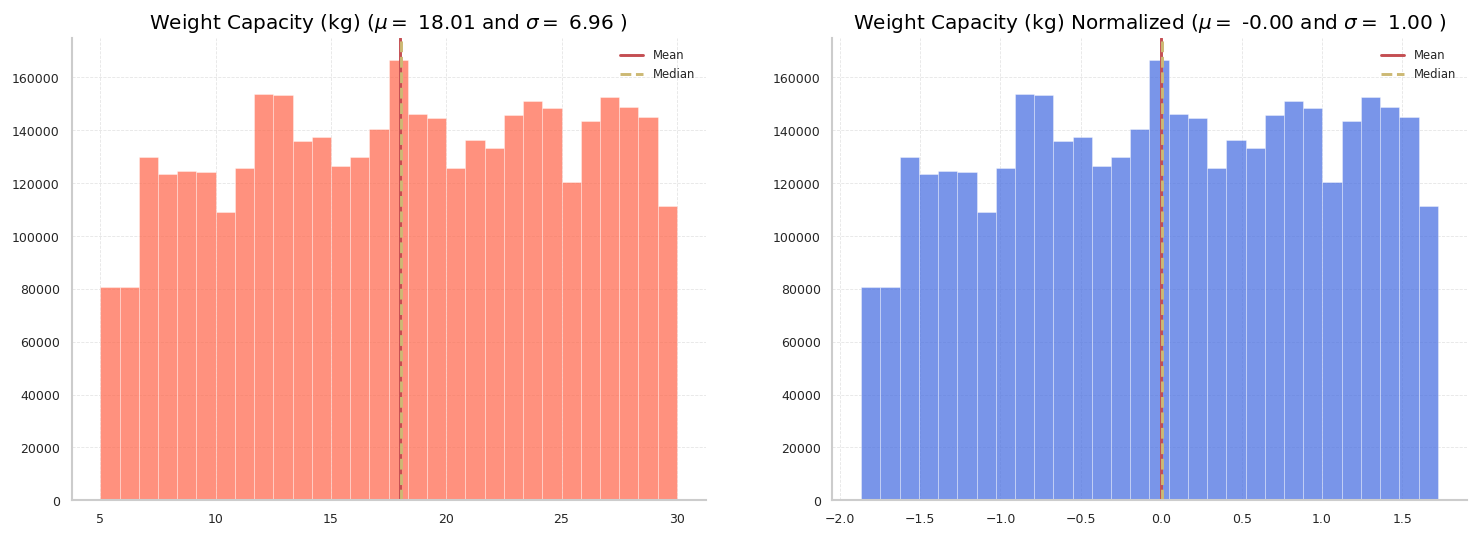

In [21]:
t = Transform()
X, X_enc, y, test, test_enc, cat_features = t()

In [22]:
print(t.cat_features, t.cat_features_card, t.train.shape, t.direction_)
X_enc.info()
X_enc["Compartments"].unique()

['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)_missing'] [6, 5, 4, 10, 3, 3, 4, 7, 2] (3994318, 10) minimize
<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Brand                         int64  
 1   Material                      int64  
 2   Size                          int64  
 3   Compartments                  int64  
 4   Laptop Compartment            int64  
 5   Waterproof                    int64  
 6   Style                         int64  
 7   Color                         int64  
 8   Weight Capacity (kg)          float32
 9   Weight Capacity (kg)_missing  int64  
dtypes: float32(1), int64(9)
memory usage: 320.0 MB


array([7, 1, 2, 8, 0, 3, 5, 9, 6, 4])

In [23]:
X_enc["Weight Capacity (kg)_missing"].value_counts()

,count
Weight Capacity (kg)_missing,
0,3992510
1,1808


## 3.0 Additional Feature Engeneering:

In [24]:
import itertools
X["Price"] = y
# Assuming your features are in a list called 'features'
features = t.cat_features
# Generate all combinations of 3 features
combinations = list(itertools.combinations(features[:-1], 3))

df_results = pd.DataFrame(index=combinations, columns=["median_min","median_max"])

# Print the combinations
for cnt, combination in tqdm(enumerate(combinations)):

    grouped = X.groupby(list(combination),as_index=True)["Price"].agg(["mean","median","std","skew","count", "min", "max"])
    grouped = grouped.reset_index().sort_values(by="median",ascending=False)

    df_results.iloc[cnt,:]["median_max"] = grouped.iloc[0]["median"]
    df_results.iloc[cnt,:]["median_min"] = grouped.iloc[-1]["median"]

low_med_combos = df_results.sort_values(by="median_min",ascending=False).iloc[-10:,:]#.index.tolist()
high_med_combos = df_results.sort_values(by="median_max",ascending=False).iloc[:10,:]#.index.tolist()

tot_feat = set(high_med_combos.index.tolist()+low_med_combos.index.tolist())
display(low_med_combos)
display(high_med_combos)

56it [00:36,  1.54it/s]


,median_min,median_max
"(Material, Laptop Compartment, Waterproof)",39.617897,99.28788
"(Size, Laptop Compartment, Waterproof)",39.087284,111.014984
"(Size, Waterproof, Color)",37.318268,83.143127
"(Size, Compartments, Style)",36.264999,84.601669
"(Material, Size, Color)",36.16494,84.820557
"(Material, Compartments, Waterproof)",34.985909,83.327347
"(Brand, Laptop Compartment, Waterproof)",34.135811,82.710831
"(Size, Compartments, Waterproof)",29.757946,82.615021
"(Material, Size, Compartments)",25.272631,84.204887
"(Compartments, Laptop Compartment, Waterproof)",22.76762,85.282372


,median_min,median_max
"(Brand, Size, Compartments)",68.186211,135.290344
"(Material, Compartments, Laptop Compartment)",69.009651,129.023163
"(Brand, Size, Color)",65.50428,124.977364
"(Size, Compartments, Laptop Compartment)",67.989639,123.913742
"(Brand, Material, Size)",39.644875,123.177429
"(Brand, Size, Waterproof)",41.966492,121.351219
"(Brand, Size, Laptop Compartment)",73.708282,118.659973
"(Brand, Size, Style)",50.637852,118.544884
"(Size, Laptop Compartment, Color)",67.984192,115.737343
"(Size, Laptop Compartment, Style)",65.037132,114.096207


In [25]:
X_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Brand                         int64  
 1   Material                      int64  
 2   Size                          int64  
 3   Compartments                  int64  
 4   Laptop Compartment            int64  
 5   Waterproof                    int64  
 6   Style                         int64  
 7   Color                         int64  
 8   Weight Capacity (kg)          float32
 9   Weight Capacity (kg)_missing  int64  
dtypes: float32(1), int64(9)
memory usage: 320.0 MB


In [26]:
print(X_enc.shape, test_enc.shape)
X_enc.head(5)

(3994318, 10) (200000, 10)


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Weight Capacity (kg)_missing
0,1,1,1,7,2,1,3,0,-0.917722,0
1,1,0,3,1,2,2,1,3,1.300573,0
2,5,1,3,2,2,1,1,6,-0.196013,0
3,3,3,3,8,2,1,1,3,-0.727615,0
4,0,0,1,0,2,2,1,3,-0.037447,0


**VERIFY SOME COMBINATION**

In [27]:
combo_1 = ["Size", "Laptop Compartment", "Waterproof"]
combo_2 = ["Brand", "Material", "Size"]
combo_3 = ["Compartments", "Laptop Compartment", "Waterproof"]
combo_4 = ["Brand", "Size", "Compartments"]


In [28]:
X = X_enc.copy()
X["Price"] = y
grouped = X.groupby(combo_4,as_index=True)["Price"].agg(["mean","median","std","skew","count", "min", "max"])

grouped_test = test.groupby(["Compartments", "Style", "Weight Capacity (kg)_missing"],as_index=True)["Weight Capacity (kg)"].agg(["count"])

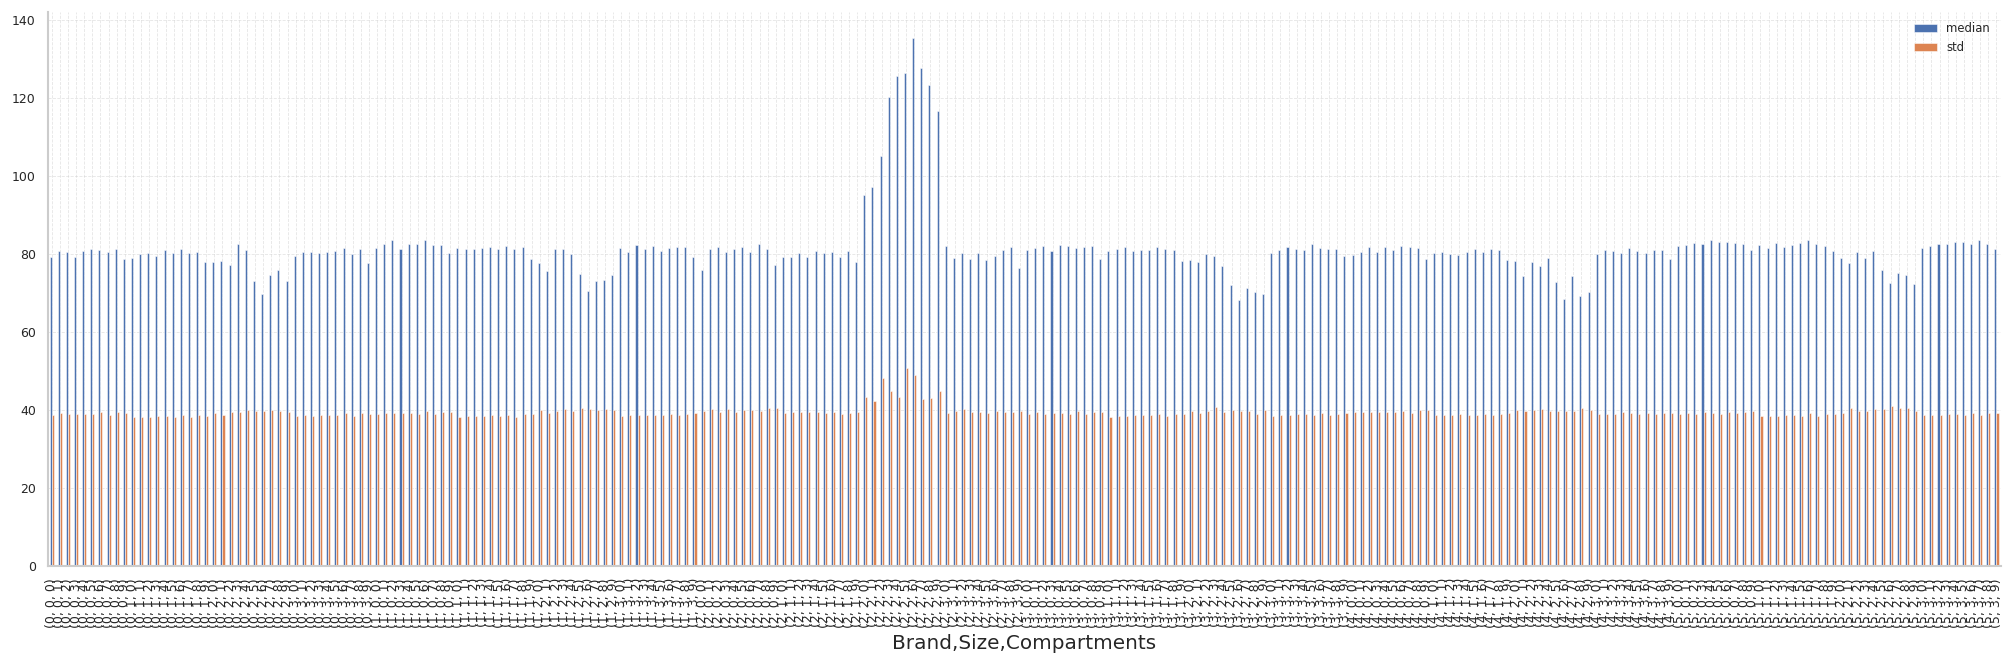

In [29]:
fig, ax = plt.subplots(figsize=(21, 6))
grouped[["median","std"]].plot(kind="bar", ax=ax);

In [30]:
grouped.reset_index().sort_values(by="mean",ascending=False).head(10)

,Brand,Size,Compartments,mean,median,std,skew,count,min,max
107,2,2,7,111.391548,127.671852,42.849873,-1.163636,110,16.464821,150.0
106,2,2,6,111.223038,135.290344,48.834152,-1.214374,62,15.000000,150.0
104,2,2,4,108.350967,125.557205,43.182911,-1.134101,158,15.100610,150.0
108,2,2,8,104.104614,123.106010,42.997906,-0.872410,111,16.542299,150.0
103,2,2,3,102.364182,120.169830,44.737087,-0.775022,173,15.236500,150.0
105,2,2,5,102.248398,126.210022,50.769444,-0.670438,90,15.836200,150.0
109,2,2,9,97.378937,116.499779,44.878258,-0.544846,201,15.000000,150.0
102,2,2,2,88.800682,105.085991,48.103790,-0.288208,229,15.000000,150.0
101,2,2,1,88.695816,97.166595,42.296013,-0.241175,252,15.000000,150.0
100,2,2,0,86.603378,94.982643,43.226658,-0.206155,282,15.630750,150.0


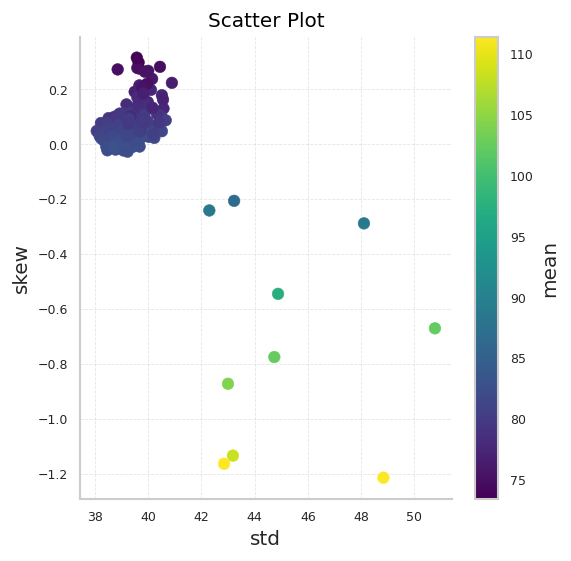

In [31]:
plot_scatter(grouped, x="std", y="skew", color_feature="mean", cmap='viridis')

In [32]:
from cuml.preprocessing import TargetEncoder

ImportError: libcublas.so.11: cannot open shared object file: No such file or directory

In [ ]:
class New_Features():

    def __init__(self, xtrain, xtest, y, combinations, target="Price"):

        self.train = xtrain.copy()
        self.test = xtest.copy()
        self.y = y.copy()
        self.target = target

        self.x_working = self.train.copy()
        self.x_test_working = self.test.copy()

        self.x_working[self.target] = self.y

        self.combinations = combinations

        self.num_features = self.train.select_dtypes(include=['float']).columns.tolist()
        self.cat_features = self.train.select_dtypes(exclude=['float']).columns.tolist()

        self.train[self.cat_features] = self.train[self.cat_features].astype('category')
        self.test[self.cat_features] = self.test[self.cat_features].astype('category')
        print(self.train.info())
        #print(self.num_features, self.cat_features)

    def execute(self):

        # Define the conditions and corresponding values for the new column 'B'
        conditions = [
                      (self.x_working[self.target] <= 50),
                      (self.x_working[self.target] > 50) & (self.x_working[self.target] < 110),
                      (self.x_working[self.target] >= 110)
                      ]

        # Create the new column 'B' using the conditions and values
        self.x_working['Target'] = np.select(conditions, [1,0,2])

        # Add Tree Based cat Features:
        self.train, self.test = self.create_new_features()
        # Add TE numeric Features:
        self.train, self.test = self.add_TE()

        return self.train, self.test,

    def create_new_features(self):

        for combo in tqdm(self.combinations):
          feat = self.x_working[list(combo)]
          feat_test = self.x_test_working[list(combo)]
          target = self.x_working['Target']

          model = DecisionTreeClassifier(max_leaf_nodes=25)
          model.fit(feat, target)

          pred = model.predict(feat)

          if pred.min() == pred.max():
              pass
          else:
              self.train[f"{combo[0][:3]}_{combo[1][:3]}_{combo[2][:3]}"] = model.predict(feat).astype("object")
              self.test[f"{combo[0][:3]}_{combo[1][:3]}_{combo[2][:3]}"] = model.predict(feat_test).astype("object")

          print(f"{combo[0][:3]}_{combo[1][:3]}_{combo[2][:3]}:", accuracy_score(target, model.predict(feat)))

        return self.train, self.test

    def add_TE(self):

        TE = TargetEncoder(n_folds=25, smooth=20, split_method='random', stat='mean')
        self.train['TE_wc'] = TE.fit_transform(self.train['Weight Capacity (kg)'],y)
        self.test['TE_wc'] = TE.transform(self.test['Weight Capacity (kg)'])

        return self.train, self.test


In [ ]:
nf = New_Features(xtrain=X_enc, xtest=test_enc, y=y, combinations=tot_feat)
X_enc_ext, test_enc_ext = nf.execute()

In [ ]:
test_enc.head()


In [ ]:
# X_enc["Price"] = y

# X_enc_class = X_enc.copy()
# # Assuming your features are in a list called 'features'
# features = t.cat_features

# # Generate all combinations of 3 features
# combinations = list(itertools.combinations(features, 3))

# X_enc_class["Target"]=0

# # Define the conditions and corresponding values for the new column 'B'
# conditions = [
#     (X_enc['Price'] <= 50),
#     (X_enc['Price'] > 50) & (X_enc['Price'] < 110),
#     (X_enc['Price'] >= 110)
# ]

# # Create the new column 'B' using the conditions and values
# X_enc_class['Target'] = np.select(conditions, [1,0,2])


# for combo in tqdm(tot_feat):
#    feat = X_enc_class[list(combo)]
#    feat_test = test_enc[list(combo)]
#    target = X_enc_class['Target']

#    model = DecisionTreeClassifier(max_leaf_nodes=25)
#    model.fit(feat, target)

#    pred = model.predict(feat)

#    if pred.min() == pred.max():
#       pass
#    else:
#       X_enc[f"{combo[0][:3]}_{combo[1][:3]}_{combo[2][:3]}"] = model.predict(feat).astype("object")
#       test_enc[f"{combo[0][:3]}_{combo[1][:3]}_{combo[2][:3]}"] = model.predict(feat_test).astype("object")

#    X_enc.drop(columns = "Price")


#    print(f"{combo[0][:3]}_{combo[1][:3]}_{combo[2][:3]}:", accuracy_score(target, model.predict(feat)))

# X_enc.drop("Price",axis=1)

In [ ]:
X_enc_ext.shape,X_enc.shape

In [ ]:
rel_cols = ['Siz_Com_Lap', 'Bra_Siz_Com',
            'Bra_Siz_Lap', 'Siz_Lap_Sty', 'Siz_Lap_Col', 'Com_Lap_Wat',
            'Bra_Mat_Siz', 'Siz_Com_Wat', 'Mat_Lap_Wat', 'Bra_Siz_Wat',
            'Siz_Lap_Wat', 'Bra_Lap_Wat', 'Mat_Siz_Col', 'Mat_Siz_Com',
            'Mat_Com_Lap', 'Bra_Siz_Sty', 'Siz_Com_Sty']
# for c in rel_cols:
#     print(test_enc_ext[c].value_counts())
X_enc_ext[X_enc_ext["Siz_Com_Lap"]==2]

In [ ]:
y

In [ ]:
from cuml.preprocessing import TargetEncoder